In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [23]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')
data

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
4727772,1609372560,28801.47,28829.42,28785.64,28829.42,0.965221,27804.572129,28806.429798
4727773,1609372620,28829.42,28863.90,28829.42,28857.06,2.368831,68332.350629,28846.441863
4727774,1609372680,28850.49,28900.52,28850.49,28882.82,2.466590,71232.784464,28879.056266
4727775,1609372740,28910.54,28911.52,28867.60,28881.30,7.332773,211870.912660,28893.695831


In [24]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], unit='s')
data = data.set_index('Timestamp')[['Weighted_Price']]
data

,Weighted_Price
Timestamp,
2011-12-31 07:52:00,4.390000
2011-12-31 07:53:00,NaN
2011-12-31 07:54:00,NaN
2011-12-31 07:55:00,NaN
2011-12-31 07:56:00,NaN
...,...
2020-12-30 23:56:00,28806.429798
2020-12-30 23:57:00,28846.441863
2020-12-30 23:58:00,28879.056266


In [25]:
daily_data = data.resample("D").mean()
daily_data

,Weighted_Price
Timestamp,
2011-12-31,4.471603
2012-01-01,4.806667
2012-01-02,5.000000
2012-01-03,5.252500
2012-01-04,5.208159
...,...
2020-12-27,27043.386470
2020-12-28,26964.020499
2020-12-29,26671.008099


In [26]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=daily_data.index, y=daily_data['Weighted_Price'], name='Weighted Price'))
fig.update_layout(title="BTC price history", xaxis_title="Datetime", yaxis_title="Weighted Price")
fig.show()

btc_data = daily_data.copy()[['Weighted_Price']]
print(btc_data.describe())

       Weighted_Price
count     3286.000000
mean      3497.706825
std       4548.682768
min          4.331667
25%        240.561025
50%        654.758228
75%       6777.880813
max      28909.166061


In [27]:
print("N null: ",btc_data.isnull().sum())

N null:  Weighted_Price    3
dtype: int64


In [28]:
arr_null = np.where(btc_data.isnull()==True)[0]
print("Index of null: ", arr_null)
if np.where(btc_data.isnull()==True):
    val_fill_null = btc_data[min(arr_null)-3:max(arr_null)+4].mean()[0]
    btc_data = btc_data.fillna(val_fill_null,inplace = False)

Index of null:  [1102 1103 1104]


In [29]:
n_years = 7 # 7 years for training
period = 365*n_years
train_data = btc_data.iloc[:period]
test_data = btc_data.iloc[period:]

print("Training shape: ", train_data.shape)
print("Test shape: ", test_data.shape)

Training shape:  (2555, 1)
Test shape:  (734, 1)


In [30]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Weighted_Price'], name='Training'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Weighted_Price'], name='Test'))

fig.update_layout(title="BTC price history", xaxis_title="Datetime", yaxis_title="Weighted Price")
fig.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_data)

print('ADF Statistic: %f' % result[0]) 
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.891007
p-value: 0.336303
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [32]:
first_diff = train_data.diff()

result = adfuller(first_diff[1:])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -9.355544
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=33445.437, Time=1.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=33572.801, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=33482.242, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=33492.166, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=33570.980, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=33444.809, Time=1.39 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=33475.869, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=33482.449, Time=0.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=33445.568, Time=1.40 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=33473.566, Time=0.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=33445.143, Time=1.59 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=33446.062, Time=2.96 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=33442.902, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=33473.978, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0

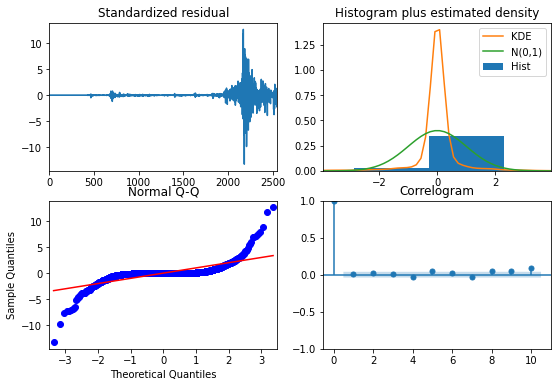

In [33]:
import pmdarima as pm

auto = pm.auto_arima(
    train_data, d=1, 
    seasonal=False, stepwise=True,
    suppress_warnings=True, error_action="ignore", 
    max_p=6, max_order=None, trace=True
)

auto.plot_diagnostics(figsize=(9,6))
plt.show()

In [34]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2555
Model:               SARIMAX(1, 1, 2)   Log Likelihood              -16717.451
Date:                Mon, 17 May 2021   AIC                          33442.902
Time:                        13:00:32   BIC                          33466.284
Sample:                             0   HQIC                         33451.382
                               - 2555                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9310      0.006   -162.215      0.000      -0.942      -0.920
ma.L1          1.1252      0.007    160.069      0.000       1.111       1.139
ma.L2          0.2241      0.005     43.748      0.000       0.214       0.234
sigma2      2.837e+04    158.403    179.132      0.000    2.81e+04    2.87e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):            270807.36
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):             236.83   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        53.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [35]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA


mod = ARIMA(train_data, order=(1,1,2))
results = mod.fit(disp=0)
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.Weighted_Price   No. Observations:                 2554
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -16717.389
Method:                       css-mle   S.D. of innovations            168.444
Date:                Mon, 17 May 2021   AIC                          33444.777
Time:                        13:00:33   BIC                          33474.004
Sample:                    01-01-2012   HQIC                         33455.376
                         - 12-28-2018                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.4443      4.055      0.356      0.722      -6.503       9.392
ar.L1.D.Weighted_Price    -0.9310      0.024    -38.834      0.000      -0.978      -0.884
ma.L

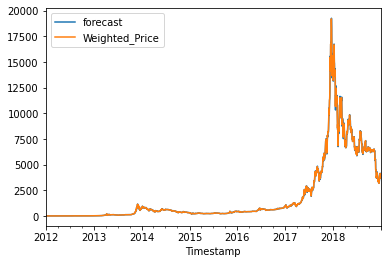

In [36]:
results.plot_predict(dynamic=False)
plt.show()

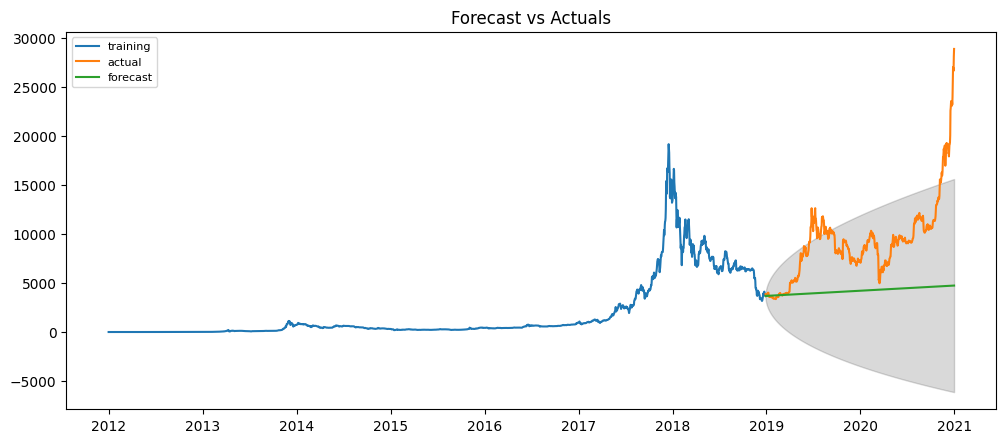

In [37]:
n_period=test_data.shape[0]
fc, se, conf = results.forecast(n_period)

# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index[:n_period])
lower_series = pd.Series(conf[:, 0], index=test_data.index[:n_period])
upper_series = pd.Series(conf[:, 1], index=test_data.index[:n_period])

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data[:n_period], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
forecast, _, confidence = results.forecast(test_data.shape[0], alpha=0.05)

forecast_series = pd.Series(forecast, index=test_data.index)
lower_bound = pd.Series(confidence[:, 0], index=test_data.index)
upper_bound = pd.Series(confidence[:, 1], index=test_data.index)

fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data['Weighted_Price'], name='Training'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data['Weighted_Price'], name='Test'))
fig.add_trace(go.Scatter(x=forecast_series.index, y=forecast_series.values, name='Forecast'))


fig.add_trace(go.Scatter(x=lower_bound.index, y=lower_bound, name='Lower Bound',
                         mode = 'lines', fill='tonexty', fillcolor='rgba(101, 101, 101, 0.1)',
                         line=dict(width=0.5)))

fig.add_trace(go.Scatter(x=upper_bound.index, y=upper_bound, name='Upper Bound',
                         mode = 'lines', fill='tonexty', fillcolor='rgba(101, 101, 101, 0.1)',
                         line=dict(width=0.5)))


fig.update_layout(title="BTC - Forecast", xaxis_title="Datetime", yaxis_title="Weighted Price")
fig.show()

y_truth = test_data['Weighted_Price'].values
y_forecasted = forecast
mse_arima = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of ARIMA with train-test split is {}'.format(mse_arima))

The Mean Squared Error of ARIMA with train-test split is 39110912.718644276


The Mean Squared Error of ARIMA is 83972.33422899031


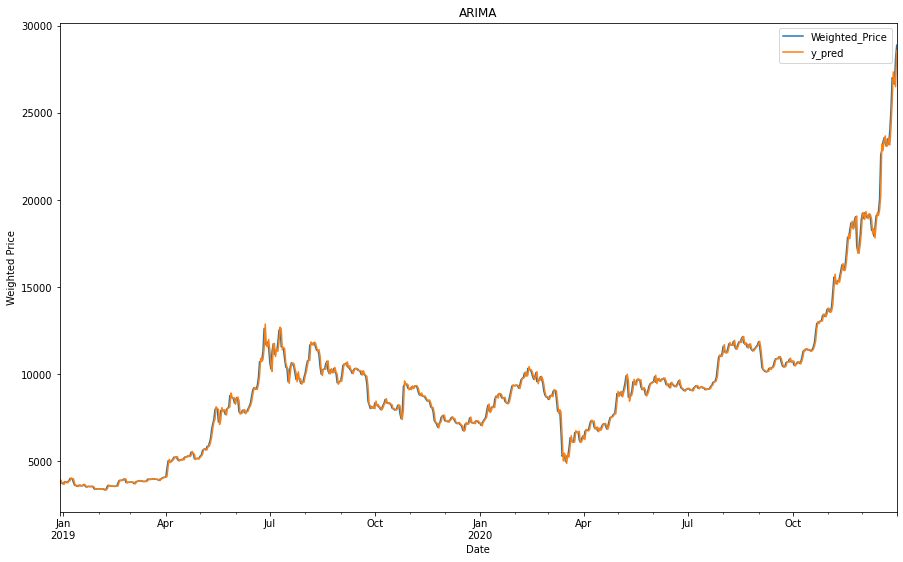

In [39]:
test_arima = test_data.copy()
train_arima = train_data.copy()
 
history = [x for x in train_arima.values]
predictions = list()

# walk-forward validation
for t in range(test_arima.shape[0]):
    model = ARIMA(history, order=(1,1,2))
    arima_results = model.fit()
    
    output = arima_results.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    obs = test_arima.iloc[t].values
    
    #append forecast value into history data
    history.append(obs)
    
predictions = np.array(predictions)
test_arima['y_pred'] = predictions
y_forecasted = test_arima['y_pred'].values
y_truth = test_arima['Weighted_Price'].values

# Compute the mean square error
mse_arima = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of ARIMA is {}'.format(mse_arima))
test_arima[['Weighted_Price', 'y_pred']].plot(title='ARIMA',figsize=(15,9))
plt.xlabel("Date")
plt.ylabel("Weighted Price")
plt.show()

fig = go.Figure()
fig.add_trace(go.Scatter(x=test_arima.index, y=test_arima['Weighted_Price'], name='Actual'))
fig.add_trace(go.Scatter(x=test_arima.index, y=test_arima['y_pred'], name='Forecast'))
fig.update_layout(title="BTC - Forecast", xaxis_title="Datetime", yaxis_title="Weighted Price")
fig.show()
